# Homework 7: Problem 2
## Low-Rank Approximation

Programmatic overhead; import numpy, scipy and matplotlib.

In [1]:
import numpy as np
from scipy import ndimage as ndi
from matplotlib import pyplot as plt

In [2]:
BASE_DIR = '/Users/mitch/Documents/Cal/2_2017_Spring/COMPSCI 289A - Intro to Machine Learning/HW07/'

Load the face and sky images as arrays

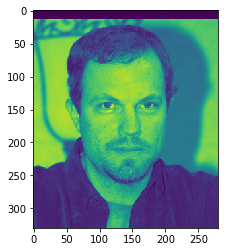

(330, 280)


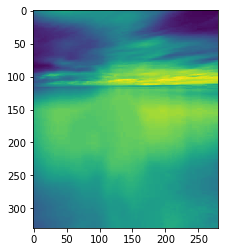

(330, 280)


In [3]:
facefile = BASE_DIR+'Data/hw7_data/low-rank_data/face.jpg'
face = ndi.imread(facefile,flatten=True)
plt.imshow(face)
plt.show()
print(np.shape(face))
skyfile = BASE_DIR+'Data/hw7_data/low-rank_data/sky.jpg'
sky = ndi.imread(skyfile,flatten=True)
plt.imshow(sky)
plt.show()
print(np.shape(sky))

In [4]:
def SVD(matrix):
    """Perform singluar value decomposition"""
    U,s,V = np.linalg.svd(matrix,full_matrices=0)
    
    return U,s,V

In [5]:
def LRA(matrix,rank):
    "Generate a low-rank approximation of the input matrix"
    U,s,V = SVD(matrix)
    s_lra = np.zeros(len(s))
    for i in range(rank):
        s_lra[i] = s[i]
    lra = np.dot(np.dot(U,np.diag(s_lra)),V)
    
    return lra

In [6]:
def MSE(matrix1,matrix2):
    "Calculate the mean squared error between 2 matrices (frobenius norm of their difference)"
    mse = np.linalg.norm(matrix1-matrix2)
    
    return mse

**(a)** Low-rank approximations of rank 5, 20, and 100 on the face image.

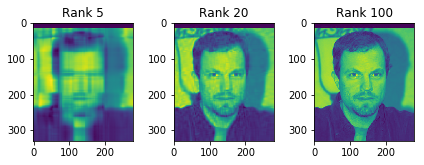

In [7]:
facefig = plt.figure()
ranks = [5,20,100]
for rank_i in range(len(ranks)):
    rank= ranks[rank_i]
    lra = LRA(face,rank)
    facefig.add_subplot(1,len(ranks),rank_i+1)
    plt.imshow(lra)
    plt.title('Rank %i'%rank)
    plt.tight_layout()

plt.savefig(BASE_DIR+'Figures/face_LRAs.jpg')
plt.show()

**(b)** Plot of mean squared error (MSE) for LRA from rank 1-100.

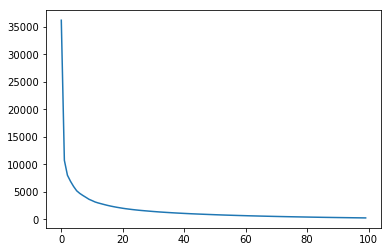

In [12]:
MSEs = []
for rank in range(100):
    lra = LRA(face,rank)
    mse = MSE(face,lra)
    MSEs.append(mse)
plt.plot(range(100),MSEs)
plt.savefig(BASE_DIR+'Figures/face_MSEs.jpg')
plt.show()

**(c)** Low-rank approximations of rank 5, 20, and 100 on the face image.

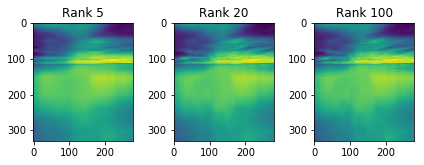

In [9]:
skyfig = plt.figure()
ranks = [5,20,100]
for rank_i in range(len(ranks)):
    rank= ranks[rank_i]
    lra = LRA(sky,rank)
    skyfig.add_subplot(1,len(ranks),rank_i+1)
    plt.imshow(lra)
    plt.title('Rank %i'%rank)
    plt.tight_layout()

plt.savefig(BASE_DIR+'Figures/sky_LRAs.jpg')
plt.show()

(d) The lowest rank at which the low-rank images are indistinguishable is found by inspection.

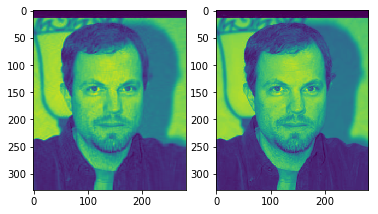

Rank 40 



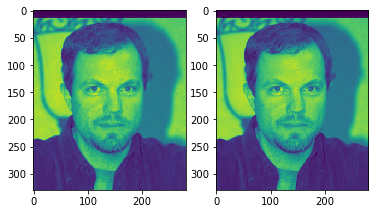

Rank 45 



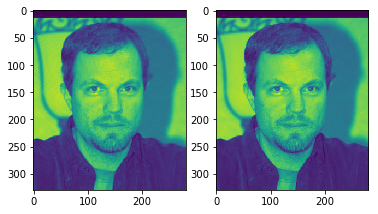

Rank 50 



In [10]:
for rank in [40,45,50]:
    lra = LRA(face,rank)
    
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(lra)
    fig.add_subplot(1,2,2)
    plt.imshow(face)
    plt.show()
    print('Rank',rank,'\n')

For the face image, a rank 40 approximation shows significantly degraded resolution (especially in the forehead area), and a rank 45 approximation still seems a bit fuzzy. I find the rank 50 approximation to be sufficiently close for the two images to be considered identical.

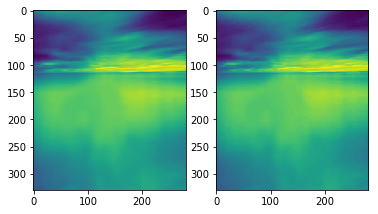

Rank 20 



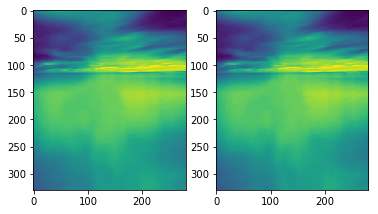

Rank 25 



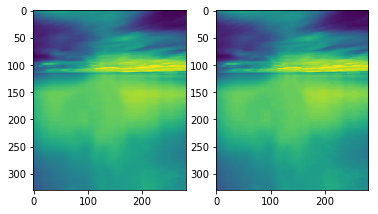

Rank 30 



In [11]:
for rank in [20,25,30]:
    lra = LRA(sky,rank)
    
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.imshow(lra)
    fig.add_subplot(1,2,2)
    plt.imshow(sky)
    plt.show()
    print('Rank',rank,'\n')

For the sky image, the rank 20 image shows a slight degradation in quality in definition of the colors in the bottom left. This effect is significantly reduced in a rank 25 image, and by a rank 30 approximation, the original and the low-rank image are nearly indistiguishable.

The difference between the sky and face images is likely caused by the level of detail. The sky image has less distinct features, so reducing the rank will likely have less impact on the clarity of each of those features. (Additionally, from a biological perspective, the human brain is incredibly adept at identifying other human faces. Even very slight differences in the face image may trigger the brain to reject the images as identical, whereas it is more apt to overlook those slight differences in the sky image.)